May 5: Constructing BASIC, the bathymetry of an idealized canyon with the dimensions of Mackenzie canyon that will be used to test NEMO's performance at these scales.

The shape of the continental shelf containing the canyon is defined as
$$H_0(x,y) = H_D - \frac{1}{2} \big(H_D - H_S \big) \Bigg[ 1 - tanh \Big( \frac{y-y_0(x)}{y_c} \Big) \Bigg]$$

$H_D$ = maximum depth in domain

$H_S$ = shelf depth

$y_c$ = steepness of the continental slope

$$y_0(x) = \big( y_n + y_b \big) \Bigg[ 1-e^{\frac{-(x^2 - x_0^2)}{2b^2}} \Bigg]$$

$y_n$ = distance between head and coast

$y_b$ = distance between head and shelf break

$x_0$ = location of axis

$b$ = canyon width

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
%matplotlib inline

In [37]:
HD = 300; HS = 50; yc = 70; yn = 20; yb = 70; x0 = 50; b = 100

In [38]:
x = np.arange(0, 100, dtype=np.float)
y = np.arange(0, 100, dtype=np.float)
y0 = np.zeros((len(y),len(x)))
H0 = np.zeros((len(y),len(x)))


In [39]:
for j in range(len(y)):
    for i in range(len(x)):
        y0[j,i] = (yn+yb)*(1-np.exp((-1*(x[i]**2-x0**2))/(2*(b**2))))
        H0[j,i] = HD-0.5*(HD-HS)*(1-np.tanh((y[j]-y0[j,i])/yc))


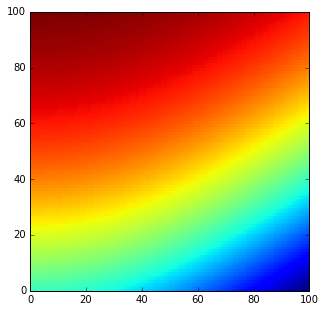

In [40]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.pcolormesh(H0)

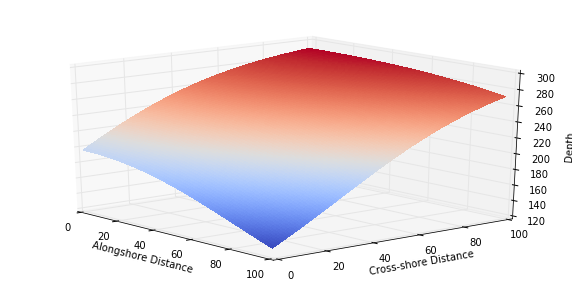

In [66]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x, y)
surf = ax.plot_surface(X, Y, H0, cmap=cm.coolwarm, linewidth=0, rstride=1, cstride=1, antialiased=False)
ax.view_init(elev=20, azim=-40)
ax.set_xlabel('Alongshore Distance')
ax.set_ylabel('Cross-shore Distance')
ax.set_zlabel('Depth')